Data Loaded Successfully ✅
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250

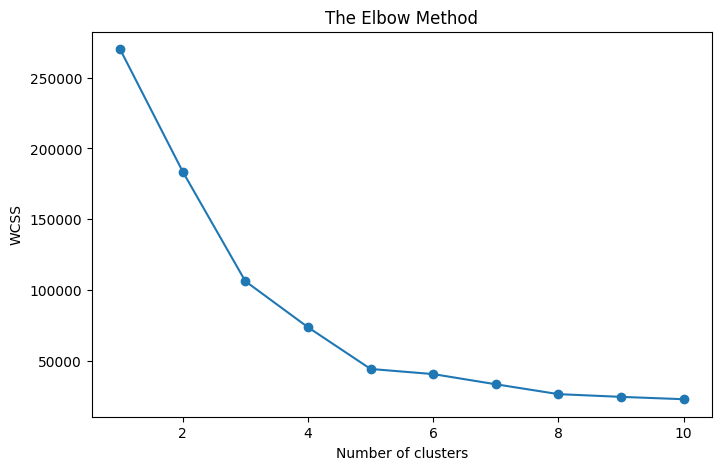

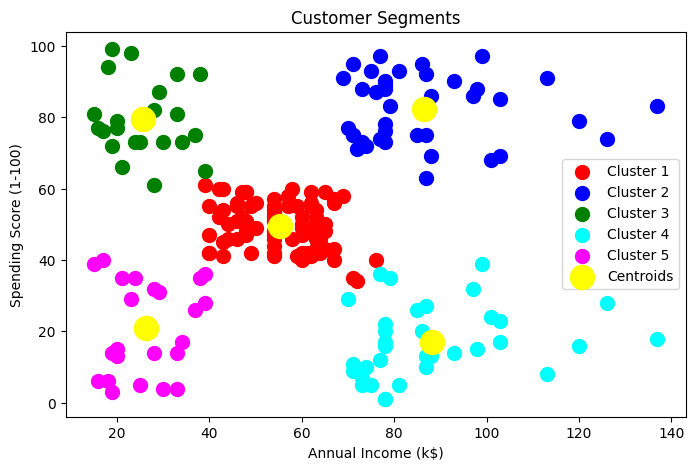

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load Data
data = pd.read_csv('data/Mall_Customers.csv')
print("Data Loaded Successfully ✅")
print(data.head())

# Data Summary
print("\nData Summary:")
print(data.describe())

# Select features for clustering: Annual Income and Spending Score
X = data.iloc[:, [3, 4]].values  # Columns: 'Annual Income (k$)', 'Spending Score (1-100)'

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans with 5 clusters (chosen from elbow plot)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8,5))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
